In [1]:
import dropbox
from zipfile import ZipFile
import pandas as pd
from data_extract_utils import extract_zip

# Connect to dropbox
dbx = dropbox.Dropbox('cHV7yAR0J6YAAAAAAAAAAVQ1NLCrOwerbaNltPWHslYXKuUTJ5_wfgJsuFcmx83o')

In [2]:
# Download, and extract data from dropbox into memory. 
data = {}
for entry in dbx.files_list_folder('').entries:
    response = dbx.files_download('/{}'.format(entry.name))
    
    if 'zip' in entry.name:
        content = extract_zip(response[1].content)
    
        for file in content:
            df = pd.read_csv(file[1])
            data[entry.name.replace('.csv.zip', '')] = df

In [3]:
print(data.keys())

dict_keys(['application_test', 'application_train', 'bureau_balance', 'bureau', 'credit_card_balance', 'installments_payments', 'POS_CASH_balance', 'previous_application'])


In [4]:
print(data['bureau'].info())
data['bureau'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [5]:
print(data['bureau_balance'].info())
data['bureau_balance'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [6]:
data['bureau'].head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [7]:
data['bureau_balance'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: STATUS, dtype: int64


<AxesSubplot:>

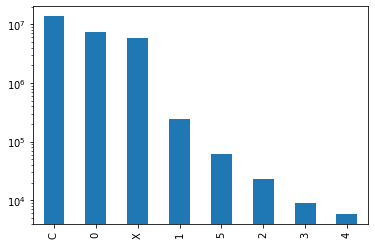

In [8]:
# Count unique values for Status
print(data['bureau_balance']['STATUS'].value_counts())
data['bureau_balance']['STATUS'].value_counts().plot(kind='bar', logy=True)

In [11]:
data['bureau']['SK_ID_BUREAU'].is_unique
bureau_df = data['bureau'].set_index('SK_ID_BUREAU')

In [13]:
# Check if every 'SK_ID_BUREAU' has a value in balances
data['bureau_balance']['SK_ID_BUREAU'].nunique()

# Therefore not every credit application has a balance sheet.
# Some further info https://www.kaggle.com/c/home-credit-default-risk/discussion/57562
# We can probably use the previous balance of info as a signal

817395

In [14]:
# Ensure bureau's CREDIT_DAY_OVERDUE matches that in bureau_balance
non_DPD_status = set(['C', 'X', '0'])
def has_dpd(x):
    return (~x['STATUS'].isin(non_DPD_status) != False).sum() > 0

new_df = data['bureau_balance'].groupby(['SK_ID_BUREAU']).apply(has_dpd)

In [15]:
has_dpd_df = pd.DataFrame(new_df, columns=['HAS_DPD']);
bureau_with_dpds = pd.concat([bureau_df, has_dpd_df], axis=1)
bureau_with_dpds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1759469 entries, 5000000 to 6843457
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              float64
 1   CREDIT_ACTIVE           object 
 2   CREDIT_CURRENCY         object 
 3   DAYS_CREDIT             float64
 4   CREDIT_DAY_OVERDUE      float64
 5   DAYS_CREDIT_ENDDATE     float64
 6   DAYS_ENDDATE_FACT       float64
 7   AMT_CREDIT_MAX_OVERDUE  float64
 8   CNT_CREDIT_PROLONG      float64
 9   AMT_CREDIT_SUM          float64
 10  AMT_CREDIT_SUM_DEBT     float64
 11  AMT_CREDIT_SUM_LIMIT    float64
 12  AMT_CREDIT_SUM_OVERDUE  float64
 13  CREDIT_TYPE             object 
 14  DAYS_CREDIT_UPDATE      float64
 15  AMT_ANNUITY             float64
 16  HAS_DPD                 object 
dtypes: float64(13), object(4)
memory usage: 241.6+ MB


In [29]:
# test to see if there were HAS_DPD where the column value for CREDIT_DAY_OVERDUE is true
bureau_with_dpds[(bureau_with_dpds['CREDIT_DAY_OVERDUE'] > 0)]

,SK_ID_CURR,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,HAS_DPD
SK_ID_BUREAU,,,,,,,,,,,,,,,,,
5000316,176066.0,Active,currency 1,-177.0,20.0,127.0,NaN,NaN,0.0,36972.00,19183.50,0.000,18.000,Consumer credit,-13.0,NaN,NaN
5001624,287908.0,Active,currency 1,-1460.0,319.0,736.0,NaN,NaN,0.0,48312.00,35752.50,0.000,166.500,Credit card,-34.0,NaN,NaN
5002089,449409.0,Sold,currency 1,-2806.0,2187.0,-1786.0,-1750.0,NaN,0.0,993600.00,0.00,0.000,0.000,Consumer credit,-1734.0,0.00,True
5003177,226496.0,Active,currency 1,-837.0,8.0,10121.0,NaN,5026.500,0.0,414000.00,NaN,NaN,603.000,Credit card,-8.0,20416.50,True
5003424,402077.0,Active,currency 1,-278.0,22.0,454.0,NaN,NaN,0.0,896139.00,650875.50,0.000,31.500,Consumer credit,-27.0,49599.00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6841409,339321.0,Active,currency 1,-232.0,14.0,31130.0,NaN,NaN,0.0,112500.00,79699.50,NaN,4.500,Credit card,-13.0,NaN,NaN
6841568,221708.0,Active,currency 1,-2903.0,2654.0,-2568.0,NaN,0.000,0.0,24705.00,315.00,0.000,0.000,Consumer credit,-1606.0,NaN,NaN
6841657,212415.0,Active,currency 1,-761.0,8.0,10199.0,NaN,26761.455,0.0,544500.00,490699.80,52995.465,804.735,Credit card,-8.0,20504.25,False


In [ ]:
# Create a new column of dpd

### Summary

